In [5]:
### Simple Exploratory data analysis (EDA)
# data file: preprocessed_data.pkl
# different groups numbers based on stance
# most frequent words in tweets by groups
# total tweets distribution
# follower distribution
# following distribution
# user created time distribution
# location distribution
# language distribution
# retweets count distribution
# political stance distribution
# hashtags distribution

In [6]:
import pandas as pd
import numpy as np
import statistics as st
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Data visualization
from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator

In [7]:
data = pd.read_pickle("preprocessed_data.pkl")
data.head()

,userid,username,textid,location,language,tweetid,tweetcreatedts,retweetcount,hashtags,text,usercreatedts,following,followers,totaltweets,tags_splitted,tags_lower,pro_Russian,pro_Ukraine,Neutral,NodeType
0,1497277564200517635,GulambiLamver,0,गुलाबी_स्तान,en,1497433817086234624,2022-02-26 04:50:17,0,"[{'text': 'Ukraine', 'indices': [40, 48]}, {'t...",Coz barking is our fundamental right..\n\n#Ukr...,2022-02-25 18:29:39,4,0,2,"[Ukraine, UkraineUnderAttack, RussiaUkraineWar...","[ukraine, ukraineunderattack, russiaukrainewar...",False,True,True,pro_Ukraine
1,4832941924,Mari_Berbec,1,"Berlin, Germany",en,1497476520742309891,2022-02-26 07:39:58,0,"[{'text': 'putin', 'indices': [53, 59]}, {'tex...",@charlieweissr Socialism has nothing to do wit...,2016-01-21 13:57:12,921,224,2848,"[putin, trump]","[putin, trump]",False,False,True,Neutral
2,2314945207,Outspoken_Sam,2,"Texas, USA",en,1497066569263767555,2022-02-25 04:30:58,0,"[{'text': 'Ukraine', 'indices': [272, 280]}]",We're seeing repeated demonstrations of who Bi...,2014-01-28 05:46:59,1162,642,3869,[Ukraine],[ukraine],False,False,True,Neutral
3,2811043316,joncreed2,3,Nottinghamshire,und,1497308839401635845,2022-02-25 20:33:40,16,"[{'text': 'Ukraine', 'indices': [20, 28]}, {'t...",#Ukraine #Nottingham #nottinghamtogether #Stan...,2014-09-15 10:10:32,778,361,3960,"[Ukraine, Nottingham, nottinghamtogether, Stan...","[ukraine, nottingham, nottinghamtogether, stan...",False,True,True,pro_Ukraine
4,1239053406301335552,PChauhan_96,4,"Chamba, India",en,1497551063913619457,2022-02-26 12:36:11,276,"[{'text': 'Ukraine', 'indices': [34, 42]}]",That's a Leader ❣️ \n#Ukraine https://t.co/BpF...,2020-03-15 04:59:11,25,6,374,[Ukraine],[ukraine],False,False,True,Neutral


In [8]:
no_tag = data[data['tags_splitted']=="NA"]

proRussia = data[data['pro_Russian']==True]
proRussiaNoUkraine = data[(data['pro_Russian']==True) & (data['pro_Ukraine']==False)]

proUkraine = data[data['pro_Ukraine']==True]
proUkraineNoRussia = data[(data['pro_Russian']==False) & (data['pro_Ukraine']==True)]

non_R = data[data['pro_Russian']==False]

non = data[(data['pro_Russian']==False) & (data['pro_Ukraine']==False)]
both = data[(data['pro_Russian']==True) & (data['pro_Ukraine']==True)]

display(proRussia.shape)
display(proUkraine.shape)
display(non.shape)
display(both.shape)
display(proRussiaNoUkraine.shape)
display(proUkraineNoRussia.shape)
display(non_R.shape)

(631, 20)

(27170, 20)

(133899, 20)

(72, 20)

(559, 20)

(27098, 20)

(160997, 20)

In [9]:
node_columns = ["userid","username","usercreatedts","following","followers","totaltweets","pro_Russian","pro_Ukraine","NodeType","text"]
nodesBefore = data[node_columns][(data['tweetcreatedts'] < '2022-03-04 23:59:59+00:00')]
nodesAfter = data[node_columns][(data['tweetcreatedts'] > '2022-03-04 23:59:59+00:00')]

difAll = round(len(nodesAfter) * 100 / len(nodesBefore), 2)
print("Tweets before Russia's block:", len(nodesBefore), "and after:", len(nodesAfter), "\nDifference:", difAll,"%", len(nodesAfter)-len(nodesBefore))

proRussianBefore = proRussia[node_columns][(proRussia['tweetcreatedts'] < '2022-03-04 23:59:59+00:00')]
proRussianAfter = proRussia[node_columns][(proRussia['tweetcreatedts'] > '2022-03-04 23:59:59+00:00')]
difRus = round(len(proRussianAfter) * 100 / len(proRussianBefore),2)
print("Pro-Russian tweets before Russia's block:", len(proRussianBefore), "and after:", len(proRussianAfter), "\nDifference:", difRus,"%", len(proRussianAfter)-len(proRussianBefore))

ratioBefore = round(len(proRussianBefore)/len(nodesBefore), 4)
ratioAfter = round(len(proRussianAfter)/len(nodesAfter), 4)

print("Ratio pro-Russian:Total tweets before block:", ratioBefore, "and after:", ratioAfter)


proUkraineBefore = proUkraine[node_columns][(proUkraine['tweetcreatedts'] < '2022-03-04 23:59:59+00:00')]
proUkraineAfter = proUkraine[node_columns][(proUkraine['tweetcreatedts'] > '2022-03-04 23:59:59+00:00')]
difUkr = round(len(proUkraineAfter) * 100 / len(proUkraineBefore),2)
print("Pro-Ukrainian tweets before Russia's block:", len(proUkraineBefore), "and after:", len(proUkraineAfter), "\nDifference:", difUkr,"%", len(proUkraineAfter)-len(proUkraineBefore))


bothBefore = both[node_columns][(both['tweetcreatedts'] < '2022-03-04 23:59:59+00:00')]
bothAfter = both[node_columns][(both['tweetcreatedts'] > '2022-03-04 23:59:59+00:00')]
difBoth = round(len(bothAfter) * 100 / len(bothBefore),2)
print("Both tweets before Russia's block:", len(bothBefore), "and after:", len(bothAfter), "\nDifference:", difBoth,"%", len(bothAfter)-len(bothBefore))


nonBefore = non[node_columns][(non['tweetcreatedts'] < '2022-03-04 23:59:59+00:00')]
nonAfter = non[node_columns][(non['tweetcreatedts'] > '2022-03-04 23:59:59+00:00')]
difNon = round(len(nonAfter) * 100 / len(nonBefore),2)
print("Neutral tweets before Russia's block:", len(nonBefore), "and after:", len(nonAfter), "\nDifference:", difNon,"%", len(nonAfter)-len(nonBefore))

Tweets before Russia's block: 73333 and after: 88295 
Difference: 120.4 % 14962
Pro-Russian tweets before Russia's block: 431 and after: 200 
Difference: 46.4 % -231
Ratio pro-Russian:Total tweets before block: 0.0059 and after: 0.0023
Pro-Ukrainian tweets before Russia's block: 10413 and after: 16757 
Difference: 160.92 % 6344
Both tweets before Russia's block: 38 and after: 34 
Difference: 89.47 % -4
Neutral tweets before Russia's block: 62527 and after: 71372 
Difference: 114.15 % 8845


Word clouds

In [10]:
# FUNCTION FOR PRINTING MOST COMMON WORDS BY CATEGORY

def print_word_cloud(df):

    # print("Word cloud of most frequent words for the sentiment : {}".format(sentiment))

    temp_df = df
    print("Number of Rows : ", len(temp_df))

    corpus = ''
    for text in temp_df.text:
        text = str(text)
        corpus += text
        
    total = 0
    count = defaultdict(lambda: 0)
    for word in corpus.split(" "):
        total += 1
        count[word] += 1
        
    top20pairs = sorted(count.items(), key=lambda kv: kv[1], reverse=True)[:20]
    top20words = [i[0] for i in top20pairs]
    top20freq = [i[1] for i in top20pairs]
    print("Top 20 words:", top20pairs)
    
    xs = np.arange(len(top20words))
    width = 0.5

    fig = plt.figure(figsize=(10,6))                                                               
    ax = fig.gca()  #get current axes
    ax.bar(xs, top20freq, width, align='center')

    ax.set_xticks(xs)
    ax.set_xticklabels(top20words)
    plt.xticks(rotation=45)
    
    
    stopwords = set(STOPWORDS)
    # lower max_font_size, change the maximum number of word and lighten the background:
    wordcloud = WordCloud(max_font_size=50, max_words=50,stopwords=stopwords, background_color="white").generate(corpus)
    plt.figure(figsize = (12, 12), facecolor = None)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

In [11]:
from collections import defaultdict
from bs4 import BeautifulSoup
import contractions
from nltk.corpus import stopwords
import nltk
import string, re

def denoise_text(text):
    # Strip html if any. For ex. removing <html>, <p> tags
    soup = BeautifulSoup(text, "html.parser")
    text = soup.get_text()
    # Replace contractions in the text. For ex. didn't -> did not
#     text = contractions.fix(text)
    return text

def remove_stopwords(words):
        """Remove stop words from list of tokenized words"""
        new_words = []
        for word in words:
            if word not in stopwords.words('english'):
                new_words.append(word)
        return new_words

def tokenize(text):
        return nltk.word_tokenize(text)

def remove_punctuation(words):
        """Remove punctuation from list of tokenized words"""
        new_words = []
        for word in words:
                new_word = re.sub(r'[^\w\s]', '', word)
                if new_word == "https":
                    new_word = ''
                if new_word != '':
                        new_words.append(new_word)
        return new_words

def normalize_text(text):
    # text = text.apply(lambda x: denoise_text(x))
    text = tokenize(text)
    text = remove_stopwords(text)
    text = remove_punctuation(text)
    return text

Number of Rows :  431
Top 20 words: [('IStandWithPutin', 280), ('Russia', 160), ('RussiaUkraine', 132), ('istandwithrussia', 110), ('Ukraine', 85), ('Putin', 74), ('RussianUkrainianWar', 66), ('UkraineRussiaWar', 64), ('people', 53), ('s', 46), ('war', 42), ('I', 40), ('Like', 40), ('Kyiv', 38), ('USA', 35), ('millions', 33), ('NATO', 33), ('US', 32), ('America', 32), ('Iraq', 32)]


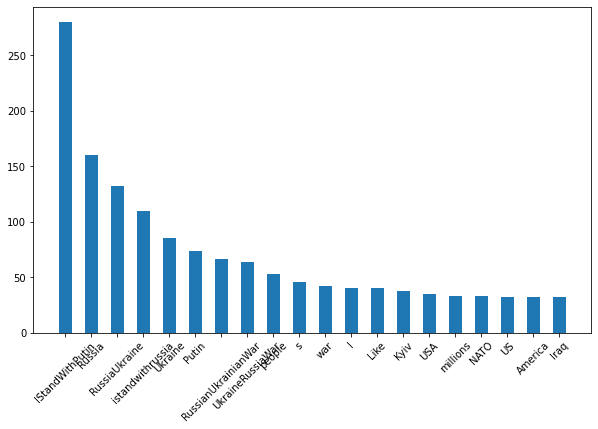

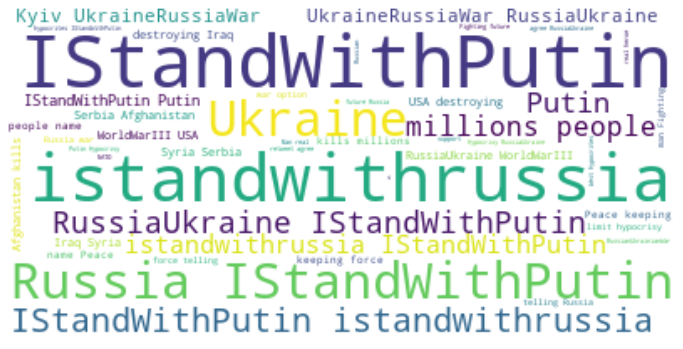

Number of Rows :  200
Top 20 words: [('IStandWithPutin', 137), ('Russia', 66), ('istandwithrussia', 65), ('Ukraine', 51), ('Putin', 43), ('RussianUkrainianWar', 26), ('UkraineRussianWar', 21), ('I', 19), ('Russian', 19), ('war', 16), ('world', 15), ('NATO', 14), ('amp', 14), ('s', 13), ('US', 12), ('IStandWithRussia', 11), ('Twitter', 11), ('IStandWithUkraine', 11), ('accounts', 10), ('hashtag', 10)]


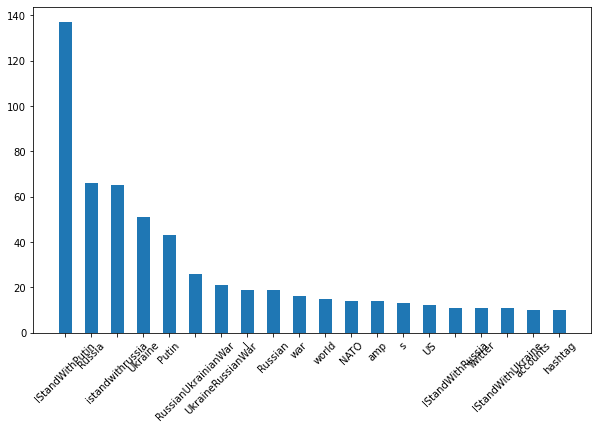

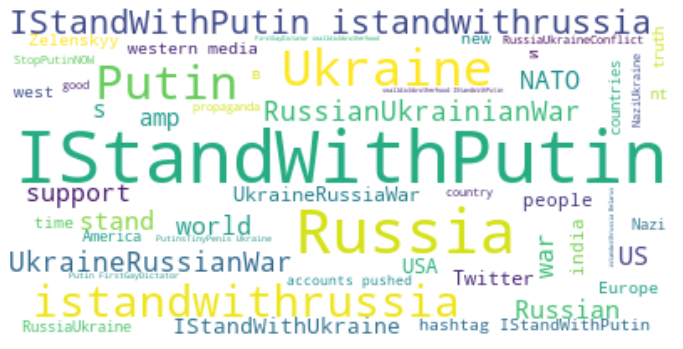

In [12]:
proRussianBefore["text"] = proRussianBefore["text"].apply(lambda x: ' '.join(normalize_text(x)))
proRussianAfter["text"] = proRussianAfter["text"].apply(lambda x: ' '.join(normalize_text(x)))

print_word_cloud(proRussianBefore)
print_word_cloud(proRussianAfter)

In [14]:
proUkraineBefore["text"] = proUkraineBefore["text"].apply(lambda x: ' '.join(normalize_text(x)))
proUkraineAfter["text"] = proUkraineAfter["text"].apply(lambda x: ' '.join(normalize_text(x)))

print_word_cloud(proUkraineBefore)
print_word_cloud(proUkraineAfter)

In [ ]:
# takes too long to preprocess, inefficient code, but it's not very important
# non["text"] = non["text"].apply(lambda x: ' '.join(normalize_text(x)))
# print_word_cloud(non)

C:\Users\Namu\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Namu\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


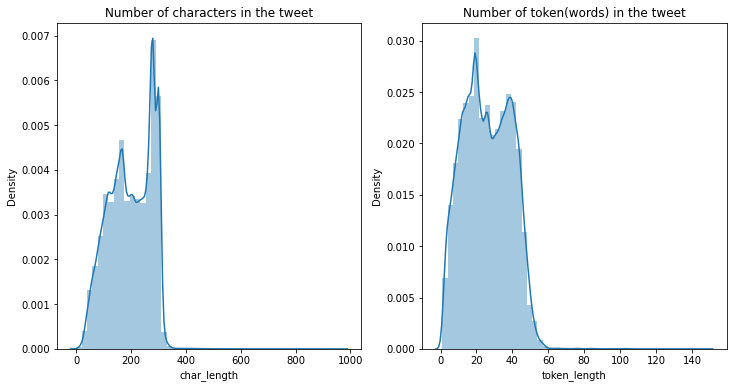

In [15]:
# Distribution of character length and token length overall
data['char_length'] = data['text'].apply(lambda x : len(x))
data['token_length'] = data['text'].apply(lambda x : len(x.split(" ")))

fig, (ax1, ax2)  = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
sns.distplot(data['char_length'], ax=ax1)
sns.distplot(data['token_length'], ax=ax2)
ax1.set_title('Number of characters in the tweet')
ax2.set_title('Number of token(words) in the tweet')
plt.show()

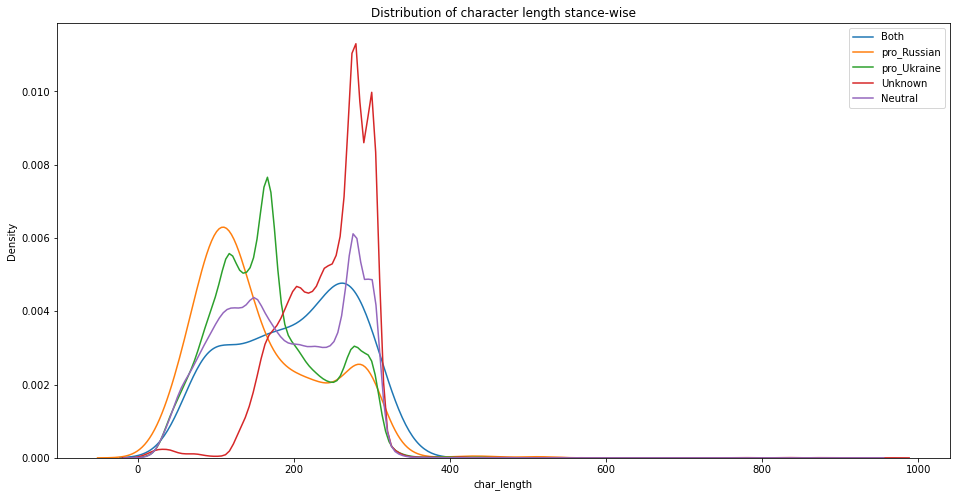

In [16]:
# Distribution of character length sentiment-wise
fig, ax = plt.subplots(figsize=(16,8))
for sentiment in data['NodeType'].value_counts().sort_values().index.tolist():
    #print(sentiment)
    sns.kdeplot(data[data['NodeType']==sentiment]['char_length'],ax=ax, label=sentiment)
ax.legend()
ax.set_title("Distribution of character length stance-wise")
plt.show()

User Created timestamp distribution

            userid
2007-12-31       1
2008-12-31       1
2009-12-31       9
2010-12-31      11
2011-12-31      19
2012-12-31      20
2013-12-31      26
2014-12-31      17
2015-12-31      14
2016-12-31      17
2017-12-31      18
2018-12-31      26
2019-12-31      34
2020-12-31      57
2021-12-31     101
2022-12-31      43


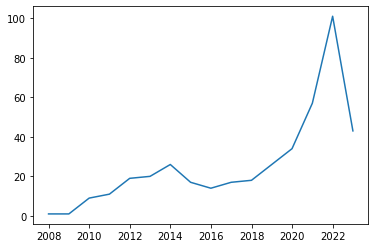

In [56]:
### Credits for code sample: https://towardsdatascience.com/how-to-plot-time-series-86b5358197d6

# insert with group want to check: proRussianBefore/proRussianAfter, proukraineBefore/proUkraineAfter, both/non, data
dataFrame = proRussianBefore

#create dict that maps ID
bus_to_check = {}

for bus, dates in zip(dataFrame['userid'], dataFrame['usercreatedts']):
    bus_to_check[bus] = dates

#create the dict with dates as keys    
check_to_bus = dict( (v,k) for k,v in bus_to_check.items())

#create dataframe from dict
mapped_df = pd.DataFrame.from_dict(check_to_bus, orient='index', columns=['userid'])

#sum over years
distribution = mapped_df.groupby(pd.Grouper(freq='Y')).count()

#print counts
print(distribution)

#plot year v total checkins
plt.plot(distribution.index, distribution.userid)

In [30]:
test = proRussianAfter[["usercreatedts","userid"]]

test.sort_values(by="usercreatedts",ascending=True, inplace=True)
test.head()
# #sum over years
checkin_year_sigma = test["usercreatedts"].groupby(pd.Grouper(freq='Y')).count()
#plot year v total checkins
plt.plot(checkin_year_sigma.index)

<ipython-input-30-f79d8061bda1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.sort_values(by="usercreatedts",ascending=True, inplace=True)


AttributeError: 'list' object has no attribute 'groupby'

### Distribution of political stance

In [ ]:
nodelist_Before = pd.read_csv("nodelist1_poli.csv")
print("Stance distribtution before:", nodelist_Before.NodeType.value_counts())

nodelist_After = pd.read_csv("nodelist2_poli.csv")
nodelist_After.NodeType.value_counts()
print("Stance distribtution after:", nodelist_After.NodeType.value_counts())

Stance distribtution before: Neutral        52147
Unknown        19717
pro_Ukraine    14047
pro_Russian     1496
Both             743
Name: NodeType, dtype: int64


<ipython-input-124-fcbca7f122ee>:4: DtypeWarning: Columns (0,1,3,4,5,6,7,8,9,10,11,12,14,15,16,17,18,19,20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  nodelist_After = pd.read_csv("nodelist2_poli.csv")


Stance distribtution after: Neutral        57120
Unknown        22254
pro_Ukraine    18994
pro_Russian      622
Both             506
Name: NodeType, dtype: int64


### Node attributes 